In [1]:
"""
Visualization of single neuron dynamics for various models
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from neuron import Neuron

# also define figure paramaters
#default plot parameters
plotparams = {'figure.figsize': (8, 10),
    'axes.labelsize': '20',
    'axes.titlesize':'22',
    'xtick.labelsize':'20',
    'ytick.labelsize':'20',
    'lines.linewidth' : 3,
    'legend.fontsize': '18',
    'text.usetex': 'True',
    'xtick.major.size': 6.,
    'ytick.major.size': 6.,
    'axes.prop_cycle'    : plt.cycler(color='bgrcmyk')
    }
plt.rcParams.update(plotparams)
#normalized guassian for constructing input signals
Gaussian_pulse= lambda x, mu, sig: np.exp(-np.power(x - mu, 2.) 
    / (2 * np.power(sig, 2.)))/(np.sqrt(2*np.pi)*sig)

Section 1: Yamada laser neuron dynamics under excitation

explanitory text

In [2]:
#Demo of spiking Yamada Neuron (version1)
#only spikes for inputs with pulse area >threshold

#basic setup stuff
#Create a basic Yamada Neuron 
Y1mpars={"a": 2, "A": 6.5, "B":-6., "gamma1": 1,
         "gamma2": 1, "kappa": 50, "beta": 5e-1 }#these are the model parameters
y1_steady_est=[Y1mpars['beta']/Y1mpars['kappa'],
               Y1mpars['A'],Y1mpars['B'] ] #quick estimate of ss
Y1params={"model" : "Yamada_1", "y0": y1_steady_est,
    "dt": 1e-2, 'mpar': Y1mpars} #neuron parameters
y1_steady=Neuron(Y1params).steady_state(y1_steady_est)
Y1params["y0"]=y1_steady #change model parameters so that starts w this ss
#now just use Y1params to initialize neurons

explanitory text

In [3]:

Y1Neuron1=Neuron(Y1params)

#create time signal, set params in terms of gamma1
t1_end=8./Y1mpars["gamma1"]; #atleast this long
N1=int(np.ceil(t1_end/Y1Neuron1.dt)) #this many points
time1=np.linspace(0.,(N1-1)*Y1Neuron1.dt, num=N1 )

#choose gaussian input
x1=np.zeros(N1)
x1+=0.2*Gaussian_pulse(time1, 0.1/Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])
x1+=0.4*Gaussian_pulse(time1, 2./Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])
x1+=0.6*Gaussian_pulse(time1, 6./Y1mpars["gamma1"], 5.e-2/Y1mpars["gamma1"])

#solve
y_out1=Y1Neuron1.solve(x1)


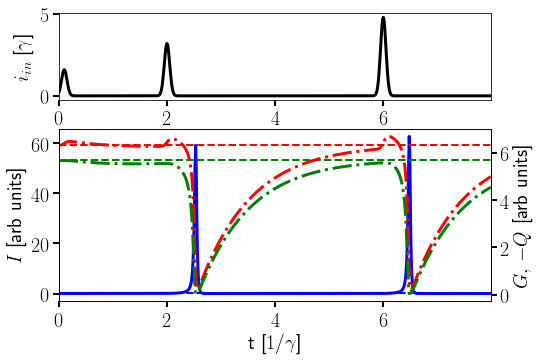

In [4]:
fig1=Y1Neuron1.visualize_plot(x1, y_out1, time1, y1_steady)
# fig1.set_size_inches(18.5, 10, forward=True)


In [5]:
# study same neuron as above,
# but now drive with constant signals to see self pusling
Y1Neuron2=Neuron(Y1params)

#create time signal
t2_end=30/Y1mpars["gamma1"]; #atleast this long
N2=int(np.ceil(t2_end/Y1Neuron2.dt))
time2=np.linspace(0.,(N2-1)*Y1Neuron2.dt, num=N2 )

#create steps out of heavisides
x2=np.zeros(N2)
#scale with gamma1 so drive in units of A
x2+=(0.3*Y1mpars["gamma1"])*np.heaviside(time2-2./Y1mpars["gamma1"], 0.5)
x2+=(0.3*Y1mpars["gamma1"])*np.heaviside(time2-8./Y1mpars["gamma1"], 0.5)
x2+=(0.6*Y1mpars["gamma1"])*np.heaviside(time2-16./Y1mpars["gamma1"], 0.5)
x2+=-(1.2*Y1mpars["gamma1"])*np.heaviside(time2-24./Y1mpars["gamma1"], 0.5)

#solve
y_out2=Y1Neuron2.solve(x2)



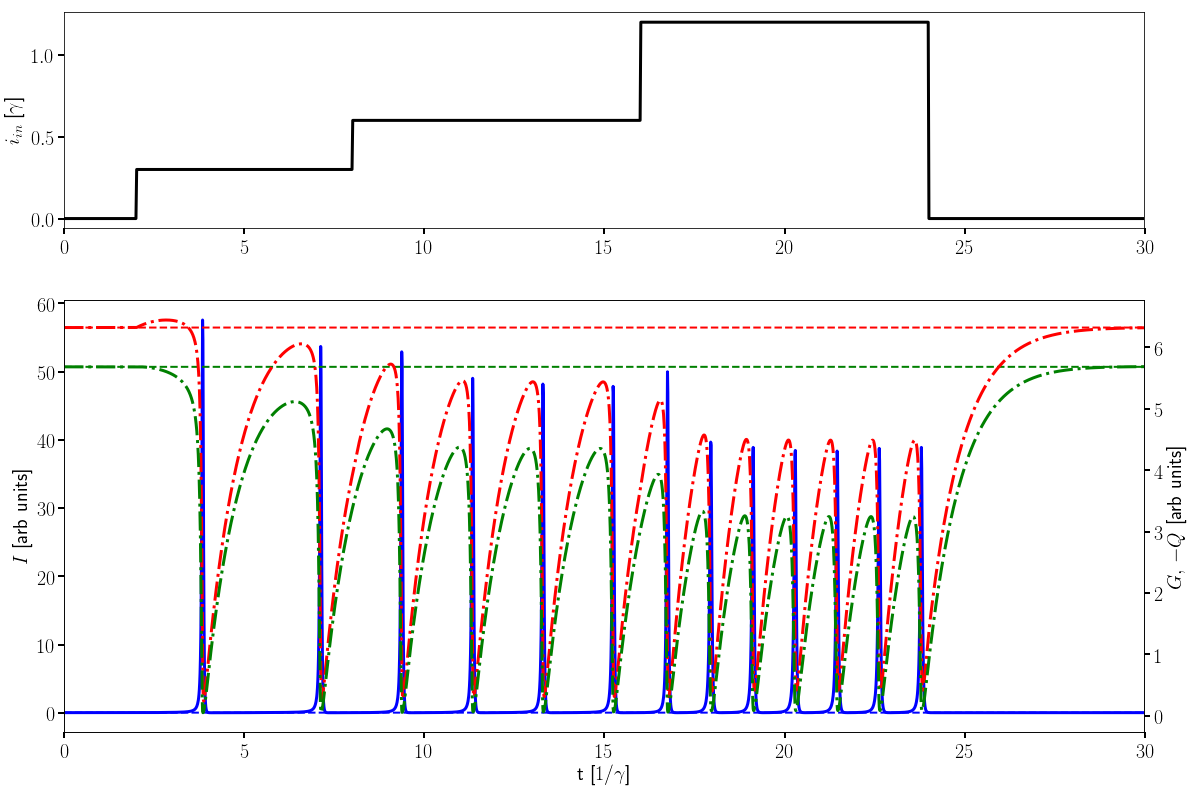

In [6]:
fig2=Y1Neuron2.visualize_plot(x2, y_out2, time2, y1_steady)
fig2.set_size_inches(15, 10, forward=True)


In [7]:
# study same neuron as above,
# showing ability to integrate multiple pulses
# also a demonstration of the refractory period

Y1Neuron3=Neuron(Y1params)

#create time signal
t3_end=7/Y1mpars["gamma1"]; #atleast this long
N3=int(np.ceil(t3_end/Y1Neuron3.dt))
time3=np.linspace(0.,(N3-1)*Y1Neuron3.dt, num=N3 )

#create steps out of heavisides
x3=np.zeros(N3)
x3+=0.1*Gaussian_pulse(time3, 0.1/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 0.3/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])

x3+=0.1*Gaussian_pulse(time3, 2./Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 2.2/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 2.4/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])

x3+=0.1*Gaussian_pulse(time3, 5.4/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 5.6/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])
x3+=0.1*Gaussian_pulse(time3, 5.8/Y1mpars["gamma1"], 1.e-2/Y1mpars["gamma1"])


#solve
y_out3=Y1Neuron3.solve(x3)


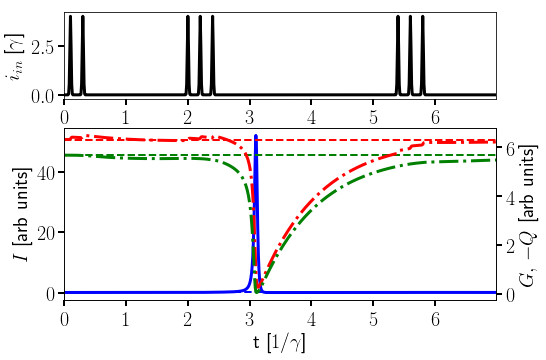

In [8]:
fig3=Y1Neuron3.visualize_plot(x3, y_out3, time3, y1_steady)
# fig3.set_size_inches(8, 10, forward=True)

Section 2: Dynamics of integrated laser neuron (simplified Yamada model)

Explanitory text

In [10]:

Y0mpars={"P": 0.,"gamma": 8., "kappa": 70., "beta": 2.e-1 }

y0_steady_est=[Y0mpars['beta']/Y0mpars['kappa'], Y0mpars['P'] ]

Y0params={"model" : "Yamada_0", "y0": y0_steady_est,
    "dt": 1.e-3, 'mpar': Y0mpars} #quick estimate of ss
y0_steady=Neuron(Y0params).steady_state(y0_steady_est)
Y0params["y0"]=y0_steady #change model parameters so that starts w this ss
#now just use Y1params to initialize neurons

In [11]:
#Demo of integrated laser Neuron (version 0)
#again, only spikes for inputs with pulse area >threshold
# now time is in [ns], all other quantities still dimensionless

Y0Neuron1=Neuron(Y0params)

#create time signal, set params in terms of gamma1
t01_end=20./Y0mpars["gamma"]; #atleast this long
N01=int(np.ceil(t01_end/Y0Neuron1.dt)) #this many points
time01=np.linspace(0.,(N01-1)*Y0Neuron1.dt, num=N01 )


#choose gaussian input
x01=np.zeros(N01)
x01+=0.2*Gaussian_pulse(time01, 1/Y0mpars["gamma"], 5.e-1/Y0mpars["gamma"])
x01+=0.3*Gaussian_pulse(time01, 8./Y0mpars["gamma"], 5.e-1/Y0mpars["gamma"])
x01+=0.4*Gaussian_pulse(time01, 16./Y0mpars["gamma"], 5.e-1/Y0mpars["gamma"])
x01=Y0mpars["gamma"]*(1-Y0mpars["P"])*x01 #put in units of difference to threshold
#solve and estimate steady state
y_out01=Y0Neuron1.solve(x01)

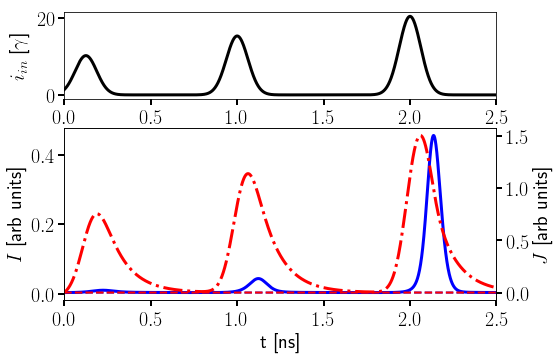

In [12]:
fig3=Y0Neuron1.visualize_plot(x01, y_out01, time01, y0_steady)
fig3.axes[0].set_xlabel('t [ns]');


Explanitory text

In [13]:
#Same integrated Neuron, showing Cooincidence detection

Y0Neuron2=Neuron(Y0params)
#create time signal, set params in terms of gamma1
t02_end=28./Y0mpars["gamma"]; #atleast this long
N02=int(np.ceil(t02_end/Y0Neuron2.dt)) #this many points
time02=np.linspace(0.,(N02-1)*Y0Neuron2.dt, num=N02 )


#choose gaussian input
x02=np.zeros(N02)
x02+=0.2*Gaussian_pulse(time02, 1/Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 8./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 10./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 17./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 18./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 24./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=-0.2*Gaussian_pulse(time02, 24.5/Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02+=0.2*Gaussian_pulse(time02, 25./Y0mpars["gamma"], 1.e-1/Y0mpars["gamma"])
x02=Y0mpars["gamma"]*(1-Y0mpars["P"])*x02 #put in units of difference to threshold
#solve
y_out02=Y0Neuron2.solve(x02)

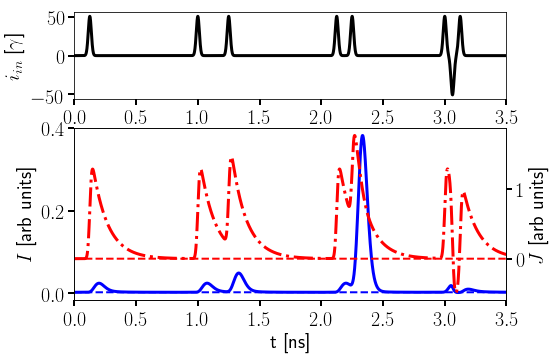

In [14]:
fig4=Y0Neuron2.visualize_plot(x02, y_out02, time02, y0_steady)
fig4.axes[0].set_xlabel('t [ns]');
